# House Prices:ベースライン
ローカル評価値：0.06468
PL 0.13714

モデル：lightgbm
前処理：カテゴリエンコード

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# 前処理
* カテゴリエンコード

In [32]:
pd_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
pd_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [33]:
pd_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [34]:
pd_all = pd.concat([pd_train,pd_test], axis=0)
pd_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [35]:
category_cols = pd_all.describe(exclude='number').columns

In [36]:
import category_encoders as ce

ce_ordinal = ce.OrdinalEncoder(cols=category_cols)
pd_train_ce_ordinal = ce_ordinal.fit_transform(pd_all)

pd_train_ce_ordinal.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,1,1,1,1,...,0,1,1,1,0,2,2008,1,1,208500.0
1,2,20,1,80.0,9600,1,1,1,1,1,...,0,1,1,1,0,5,2007,1,1,181500.0
2,3,60,1,68.0,11250,1,1,2,1,1,...,0,1,1,1,0,9,2008,1,1,223500.0
3,4,70,1,60.0,9550,1,1,2,1,1,...,0,1,1,1,0,2,2006,1,2,140000.0
4,5,60,1,84.0,14260,1,1,2,1,1,...,0,1,1,1,0,12,2008,1,1,250000.0


In [37]:
pd_train = pd_train_ce_ordinal[0:1459]
pd_test = pd_train_ce_ordinal[1460:]

x_train = pd_train.drop({'Id','SalePrice'}, axis=1)
y_train = pd_train['SalePrice']

x_test = pd_test.drop({'Id','SalePrice'}, axis=1).reset_index(drop=True)


# 学習

In [38]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from tqdm import tqdm

sf = StratifiedKFold(n_splits=5,
                         shuffle=True,
                         random_state=0)

params = {
        'objective': 'regression',
        'n_estimators': 10000,
        'silent': False,
        'metric': 'rmse',
        'early_stopping_rounds': 100,
        'lambda_l1': 6.83751010327766,
        'lambda_l2': 7.991823346452801,
        'num_leaves': 137,
        'feature_fraction': 0.42,
        'bagging_fraction': 1.0,
        'bagging_freq': 0,
        'min_child_samples': 10,
        'seed': 0
    }

lgb_results = {}
for train_idx, valid_idx in tqdm(list(sf.split(x_train, y_train))):
    trn_x = x_train.iloc[train_idx, :]
    val_x = x_train.iloc[valid_idx, :]

    trn_y = y_train[train_idx]
    val_y = y_train[valid_idx]
    
    dtrain = lgb.Dataset(trn_x, trn_y)
    dvalid = lgb.Dataset(val_x, val_y, reference=dtrain)
    model = lgb.train(params, dtrain, valid_sets=[dtrain, dvalid], verbose_eval=50, evals_result=lgb_results)
    

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
  0%|          | 0/5 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:842: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 15212.6	valid_1's rmse: 31511.6
[100]	training's rmse: 9004.55	valid_1's rmse: 33456.9


 20%|██        | 1/5 [00:04<00:19,  4.88s/it]

Early stopping, best iteration is:
[36]	training's rmse: 19163.3	valid_1's rmse: 30858.4
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 15426.2	valid_1's rmse: 32119.2
[100]	training's rmse: 9456.16	valid_1's rmse: 31351.3
[150]	training's rmse: 6611.46	valid_1's rmse: 30268.1
[200]	training's rmse: 5054.41	valid_1's rmse: 29787.2
[250]	training's rmse: 4091.78	valid_1's rmse: 29550.7
[300]	training's rmse: 3359.46	valid_1's rmse: 29324
[350]	training's rmse: 2800.63	valid_1's rmse: 29222.7
[400]	training's rmse: 2327.64	valid_1's rmse: 29121.8
[450]	training's rmse: 1960.05	valid_1's rmse: 29084.4
[500]	training's rmse: 1663.42	valid_1's rmse: 29019
[550]	training's rmse: 1400.5	valid_1's rmse: 28983.1
[600]	training's rmse: 1185.98	valid_1's rmse: 28969.3
[650]	training's rmse: 1002.4	valid_1's rmse: 28938.2
[700]	training's rmse: 860.055	valid_1's rmse: 28911.6
[750]	training's rmse: 729.707	valid_1's rmse: 28897.9
[800]	training's rmse: 624.469	

 40%|████      | 2/5 [00:16<00:20,  6.85s/it]

Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 16409.6	valid_1's rmse: 27176.1
[100]	training's rmse: 9832.33	valid_1's rmse: 25848.5
[150]	training's rmse: 6608.25	valid_1's rmse: 25587
[200]	training's rmse: 4720.06	valid_1's rmse: 25472.2
[250]	training's rmse: 3480.46	valid_1's rmse: 25510.8


 60%|██████    | 3/5 [00:18<00:10,  5.45s/it]

[300]	training's rmse: 2666.35	valid_1's rmse: 25460.5
Early stopping, best iteration is:
[211]	training's rmse: 4396.97	valid_1's rmse: 25379.7
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 16290.5	valid_1's rmse: 24340.4
[100]	training's rmse: 9359.76	valid_1's rmse: 24402.4


 80%|████████  | 4/5 [00:19<00:04,  4.08s/it]

[150]	training's rmse: 6111.48	valid_1's rmse: 24823
Early stopping, best iteration is:
[65]	training's rmse: 13508.9	valid_1's rmse: 23908.8
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 15027.4	valid_1's rmse: 30602.2
[100]	training's rmse: 8657.14	valid_1's rmse: 29219.6
[150]	training's rmse: 5842.69	valid_1's rmse: 29002.2
[200]	training's rmse: 4230.89	valid_1's rmse: 28978.6
[250]	training's rmse: 3155.29	valid_1's rmse: 29015.1
Early stopping, best iteration is:
[178]	training's rmse: 4876.73	valid_1's rmse: 28927.9


100%|██████████| 5/5 [00:21<00:00,  4.22s/it]


# モデル精度の確認

178


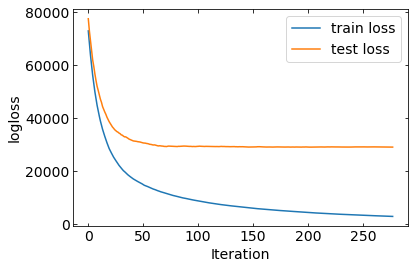

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_train = lgb_results['training']['rmse']
loss_test = lgb_results['valid_1']['rmse']
best_iteration = model.best_iteration
print(best_iteration)

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('logloss')

ax1.plot(loss_train, label='train loss')
ax1.plot(loss_test, label='test loss')

plt.legend()
plt.show()
plt.close()

In [40]:
pred = model.predict(x_train)
df_preds = pd.DataFrame(np.array(pred).reshape(-1, 1), columns=['pred'])

In [41]:
pd_result = pd.concat([y_train,df_preds],axis=1)
pd_result

,SalePrice,pred
0,208500.0,209171.627883
1,181500.0,181931.013325
2,223500.0,223317.258523
3,140000.0,140364.542229
4,250000.0,253085.679264
...,...,...
1454,185000.0,185136.257772
1455,175000.0,175071.915001
1456,210000.0,207763.383584
1457,266500.0,266423.418185


Text(0.1, 0.8, 'R^2 = 0.96849')

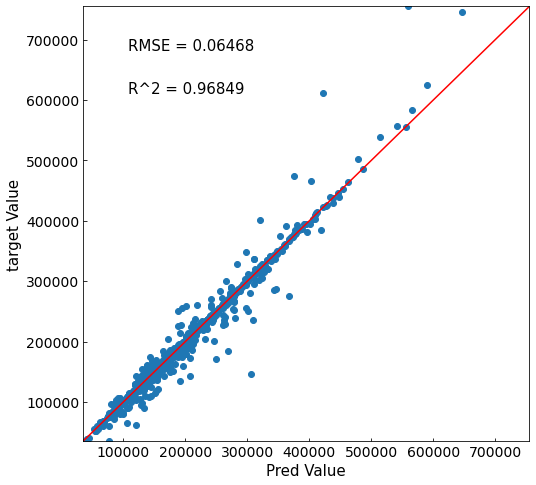

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

RMSE = np.sqrt(mean_squared_log_error(pd_result['pred'], pd_result['SalePrice']))
R2 = r2_score(pd_result['pred'], pd_result['SalePrice']) 

plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.scatter('pred', 'SalePrice',data=pd_result)
ax.set_xlabel('Pred Value', fontsize=15)
ax.set_ylabel('target Value', fontsize=15)
ax.set_xlim(pd_result.min().min()-0.1 , pd_result.max().max()+0.1)
ax.set_ylim(pd_result.min().min()-0.1 , pd_result.max().max()+0.1)
x = np.linspace(pd_result.min().min()-0.1, pd_result.max().max()+0.1, 2)
y = x
ax.plot(x,y,'r-')
plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)


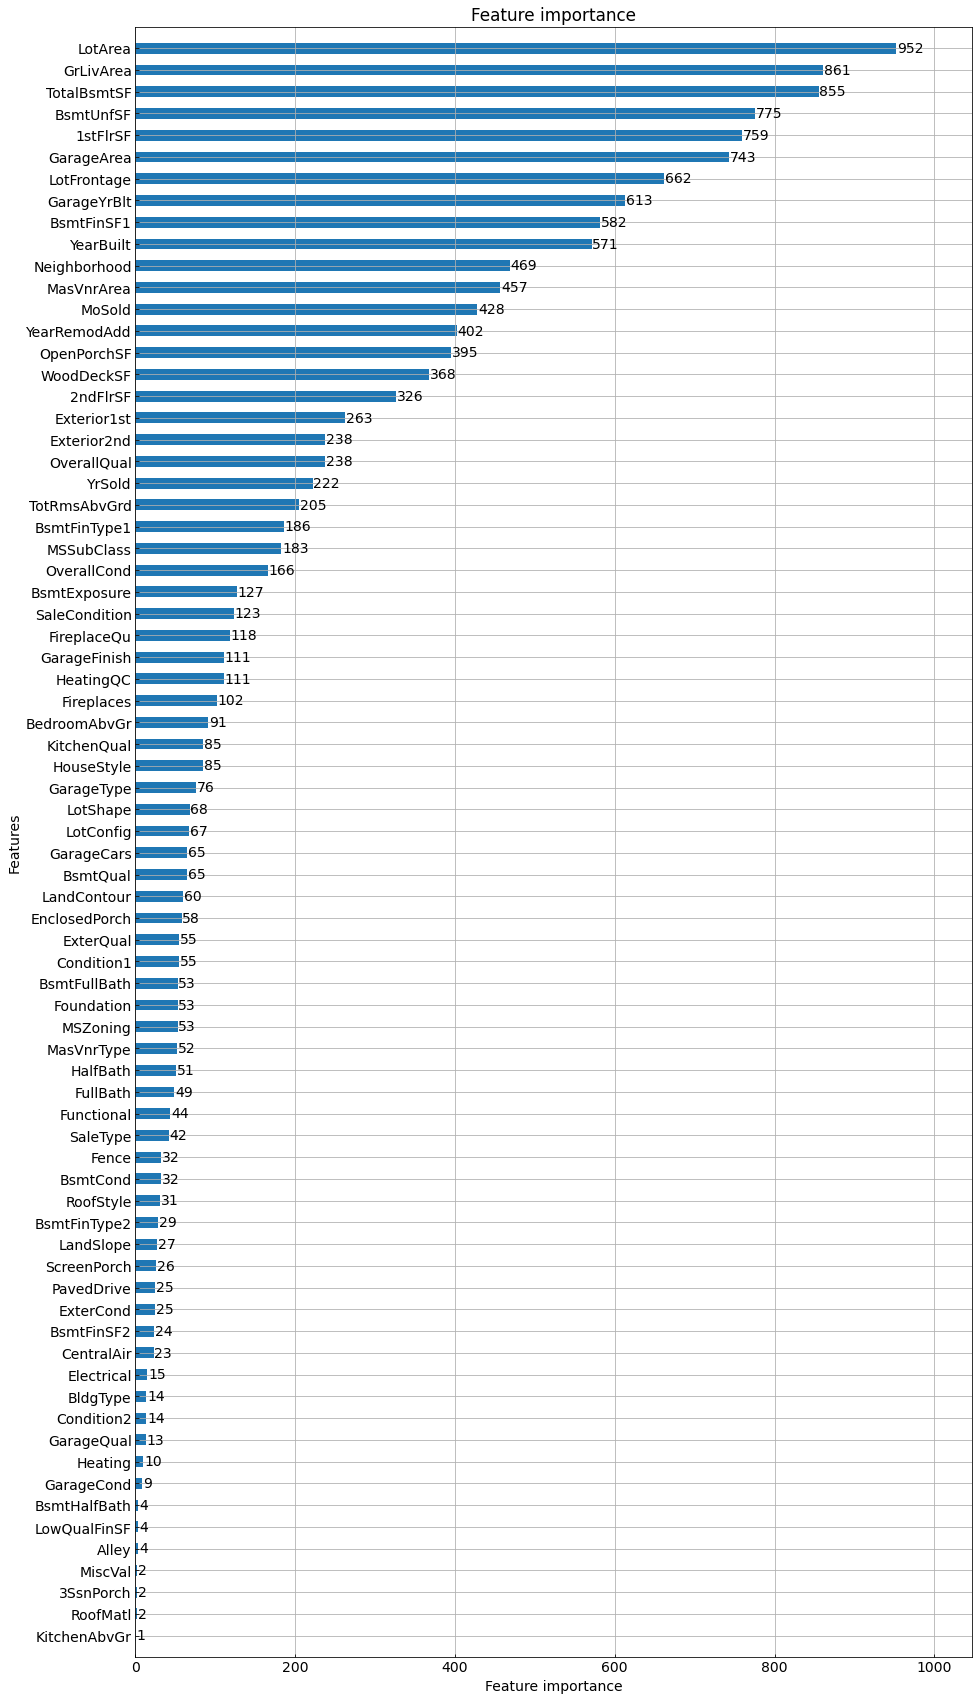

In [43]:
lgb.plot_importance(model, height=0.5, figsize=(15,30))

# submissionファイルの作成

In [59]:
submit_pred = model.predict(x_test)
df_submit_preds = pd.DataFrame(np.array(submit_pred).reshape(-1, 1), columns=['SalePrice'])
submission = pd.concat([pd_test['Id'],df_submit_preds['SalePrice']],axis=1)
submission_csv = submission.to_csv('submission.csv', header=True, index=False)